# Importing All Necessary Libraries

In [ ]:
from os import error
#reads csv file
import pandas as pd
#for corpus
import nltk
#plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import cprint
#for Sentiment Analysis
from textblob import TextBlob
#plotting graphs
import string
#import default stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
#distributes the dataset uniformly
from imblearn.over_sampling import SMOTE
#naive bayes for classification
from sklearn.naive_bayes import MultinomialNB
#create confusion matrix
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
#regex for unwanted character removal
import re
#split dataframe into training, testing part
from sklearn.model_selection import train_test_split
#for vectorization either of them can be used
#however we are getting only 80 for count but for tfidf it is around 86
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#for sarcasm
from sklearn.naive_bayes import BernoulliNB
#for conversion into  array
import numpy as np

#parse csv using pandas
tweets=pd.read_csv('Tweets.csv',encoding='ISO-8859-1')
cprint("Total number of sentiments of tweets :",'green')
print(tweets.airline_sentiment.value_counts())




Total number of sentiments of tweets :
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Sarcasm Detection Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

# Load Onion dataset
data = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)

# Convert classification into labels
data["is_sarcastic"] = data["is_sarcastic"].map({0: "Not Sarcasm", 1: "Sarcasm"})
data = data[["headline", "is_sarcastic"]]

# Prepare data for training
xsar = np.array(data["headline"])
ysar = np.array(data["is_sarcastic"])
cv = CountVectorizer()
XSAR = cv.fit_transform(xsar)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(XSAR, ysar, test_size=0.20, random_state=42)

# Train sarcasm detection model
sarcasm_model = BernoulliNB()
sarcasm_model.fit(X_train, y_train)

# Generate predictions
y_pred = sarcasm_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Not Sarcasm", "Sarcasm"])
print("Classification Report for Sarcasm Detection:")
print(report)


Classification Report for Sarcasm Detection:
              precision    recall  f1-score   support

 Not Sarcasm       0.84      0.90      0.87      2996
     Sarcasm       0.86      0.77      0.81      2346

    accuracy                           0.84      5342
   macro avg       0.85      0.84      0.84      5342
weighted avg       0.85      0.84      0.84      5342



# Pre Processing

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


<ipython-input-8-03d3ea8b7684>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'airline', data = tweets, palette = 'pastel')


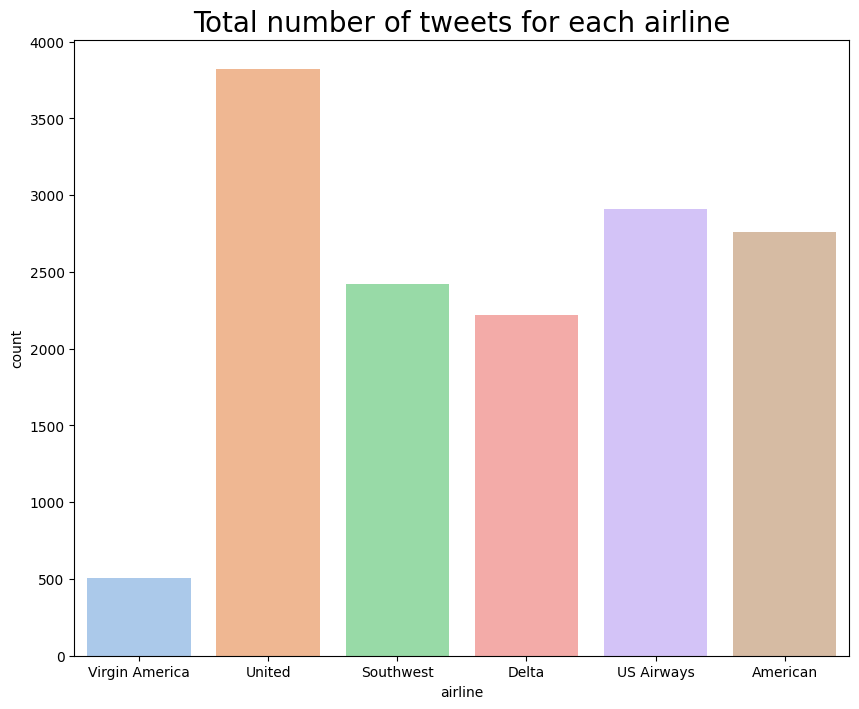

Reasons Of Negative Tweets :
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


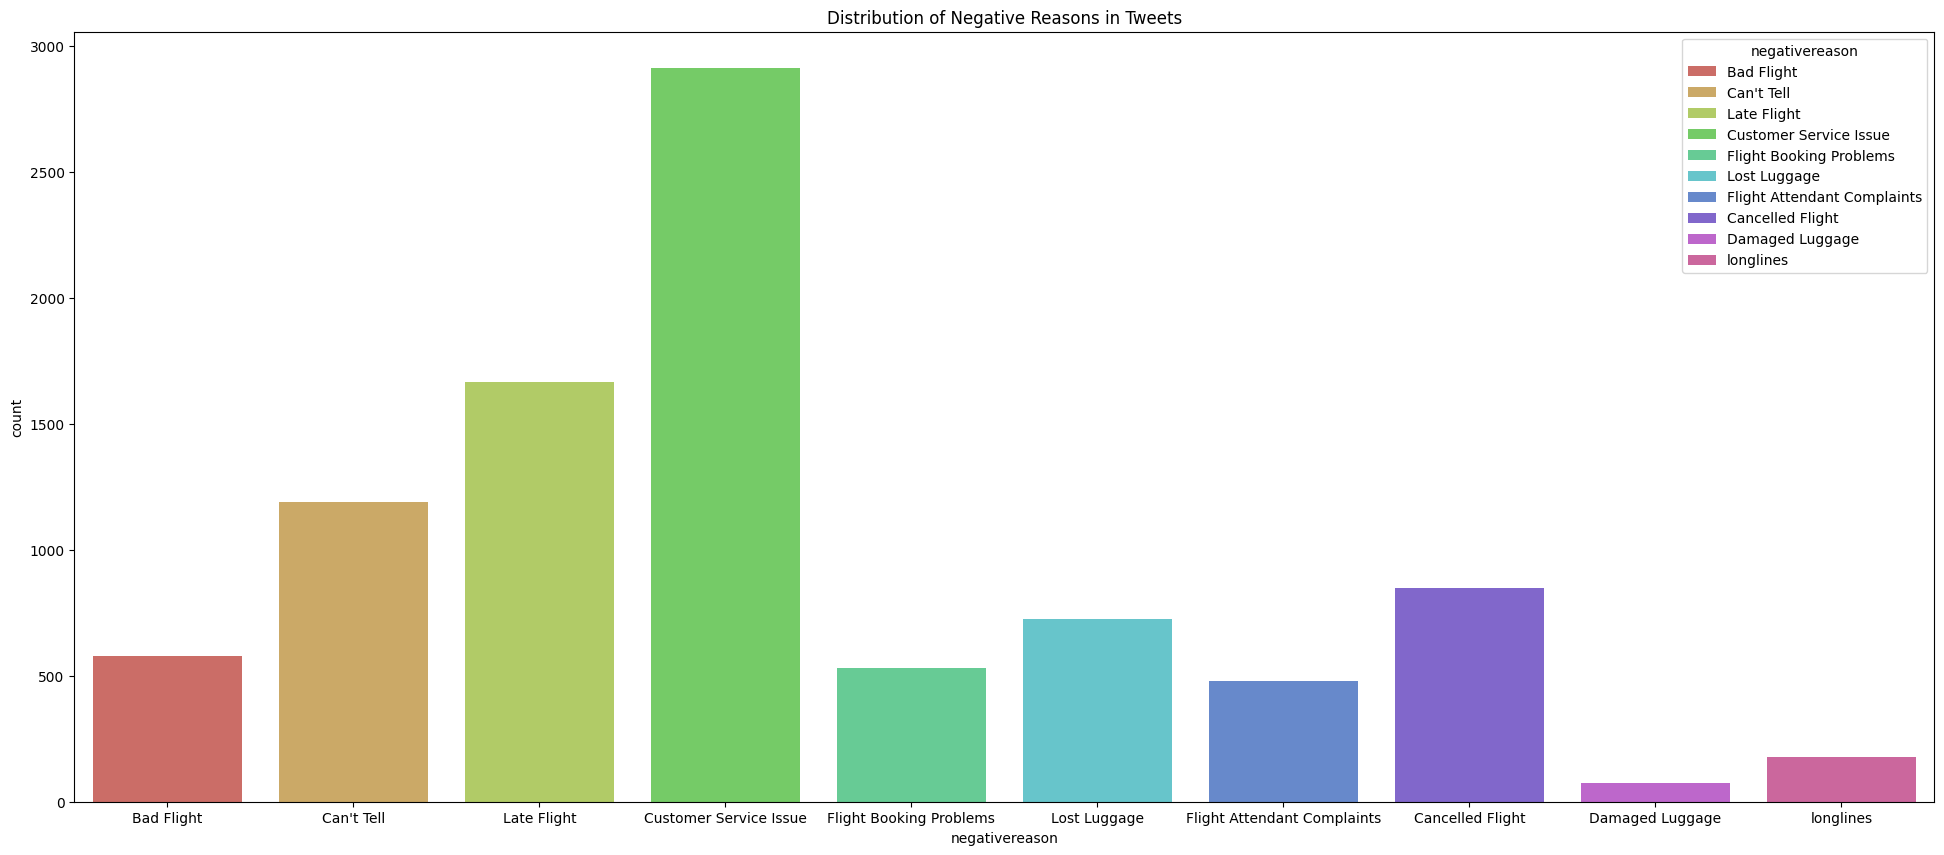

In [ ]:
cprint("Total number of tweets for each airline :",'green')
print(tweets.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = tweets, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

# Extract hashtags from tweets
tweets['hashtags'] = tweets['text'].apply(lambda x: re.findall(r'#\w+', x))


#print reasons for -ve tweets
cprint('Reasons Of Negative Tweets :','green')
print(tweets.negativereason.value_counts())
#determine size
plt.figure(figsize = (24, 10))
# Count plot of 'negativereason' with custom palette
sns.countplot(x='negativereason', data=tweets, palette='hls',hue= 'negativereason')
plt.title('Distribution of Negative Reasons in Tweets')
plt.show()

# convert Sentiments to 0,1,2 because we need numerical format
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0
#convert each of the sentiments into numerical values using
#convert sentiment function
tweets.airline_sentiment = tweets.airline_sentiment.apply(lambda x : convert_Sentiment(x))

# Remove stop words which were dowloaded form nltk
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url of cited stuff
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punctuation basic step
def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html since most of our tweets attach pic or retweet stuff
def remove_html_tags(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username common in every tweet
def remove_twitter_username(text):
    return re.sub('@[^\s]+','',text)

# Removes emojis from the tweets improves accuracy
def remove_emoji(text):
    emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emojis with faces
                          u"\U0001F300-\U0001F5FF"  # emojis like 100
                          u"\U0001F680-\U0001F6FF"  # map emojis
                          u"\U0001F1E0-\U0001F1FF"  # flags emojis
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_emoticons(text):
  EMOTICONS = {
  u":‑)": "Happy face or smiley",
  u":)": "Happy face or smiley",
  u":-]": "Happy face or smiley",
  u":]": "Happy face or smiley",
  u":-3": "Happy face smiley",
  u":3": "Happy face smiley",
  u":->": "Happy face smiley",
  u":>": "Happy face smiley",
  u"8-)": "Happy face smiley",
  u":o)": "Happy face smiley",
  u":-}": "Happy face smiley",
  u":}": "Happy face smiley",
  u":c)": "Happy face smiley",
  u":^)": "Happy face smiley",
  u"=]": "Happy face smiley"
  }
  # Create a regex pattern to match all emoticons in the EMOTICONS dictionary
  emoticon_pattern = re.compile(u'(' + u'|'.join(re.escape(k) for k in EMOTICONS.keys()) + u')')
  # Remove emoticons from the text
  return emoticon_pattern.sub(r'', text)

# abbreviate text
#there are many others possible we did most we could find
def abbreviate(text):
    text = re.sub(r"lol", " laughing out loud", text)
    text = re.sub(r"jk", " just kidding", text)
    text = re.sub(r"lmao", " laughing", text)
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric which are commonly found in twitter language
def remove_numbers(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

#remove repeated characters
def continuosly_repeated_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
tweets['final_text'] = tweets['negativereason'].fillna('') + ' ' + tweets['text']

# Apply functions on tweets
tweets['final_text'] = tweets['final_text'].apply(lambda x : remove_twitter_username(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : remove_url(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : remove_emoji(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : abbreviate(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : remove_numbers(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : unique_char(continuosly_repeated_char,x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : char(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : x.lower())
tweets['final_text'] = tweets['final_text'].apply(lambda x : remove_punctuation(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : remove_html_tags(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : remove_emoticons(x))
tweets['final_text'] = tweets['final_text'].apply(lambda x : remove_stopwords(x))


# Exploratory Data Analysis

<ipython-input-9-5a6fbfaf9c29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'airline_sentiment', data = tweets, palette = 'pastel')


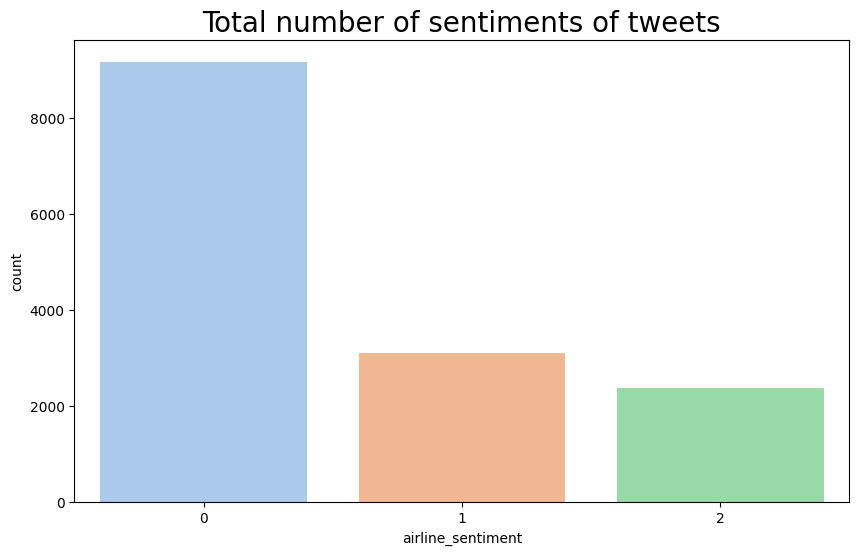

Original dataset size: 14640 rows and 22 columns


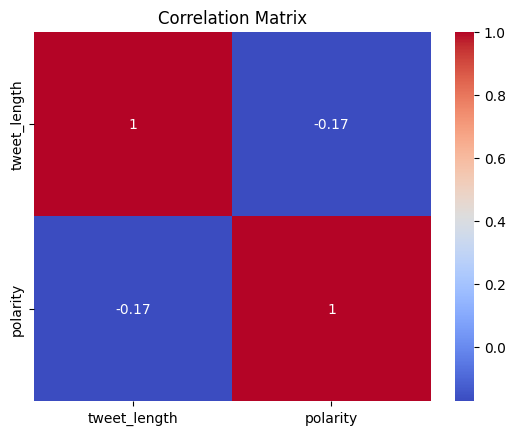

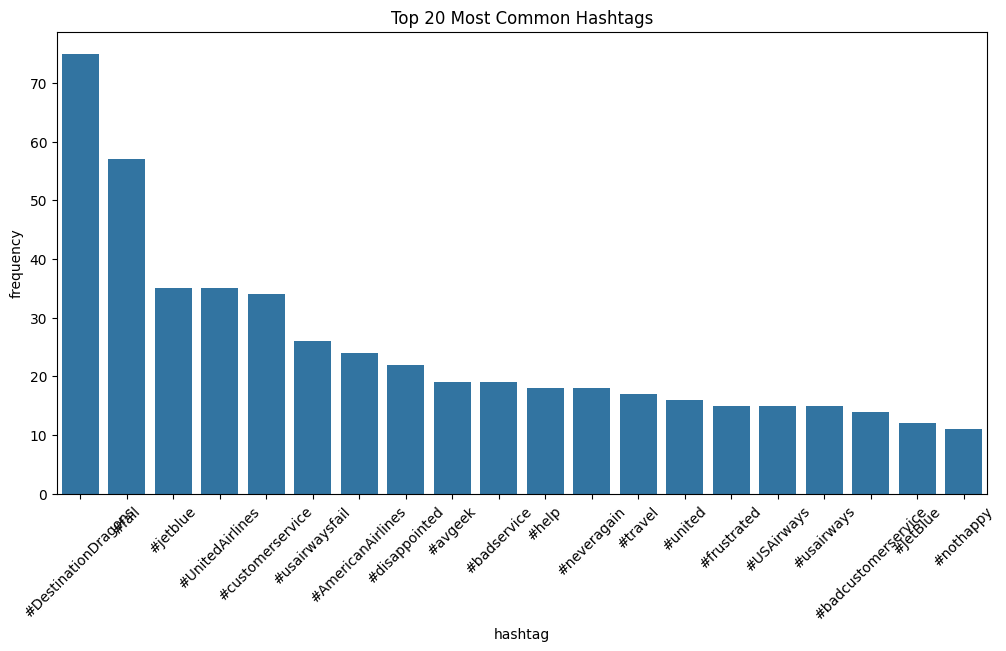

<ipython-input-9-5a6fbfaf9c29>:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created'])  # Convert to datetime
<ipython-input-9-5a6fbfaf9c29>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=tweets, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


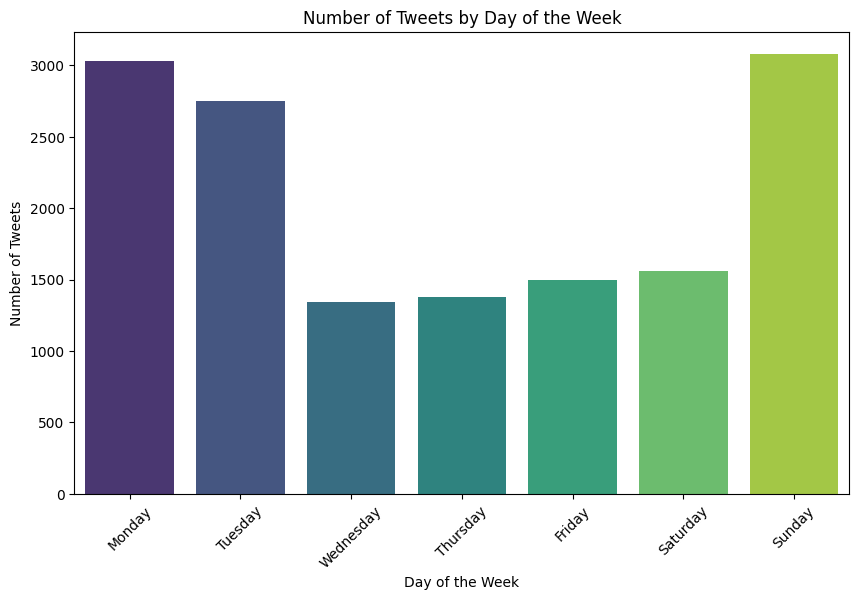

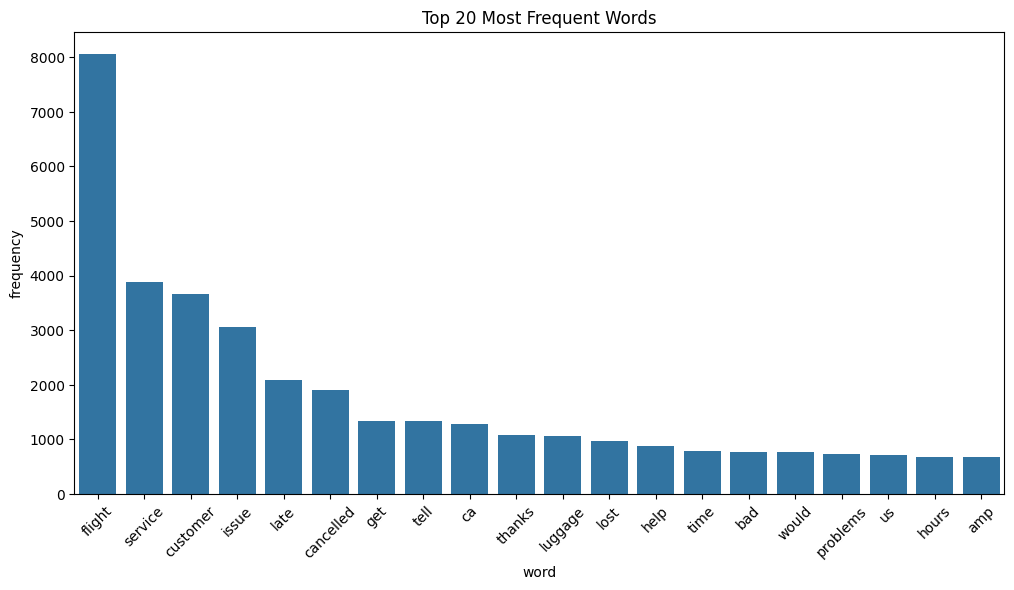

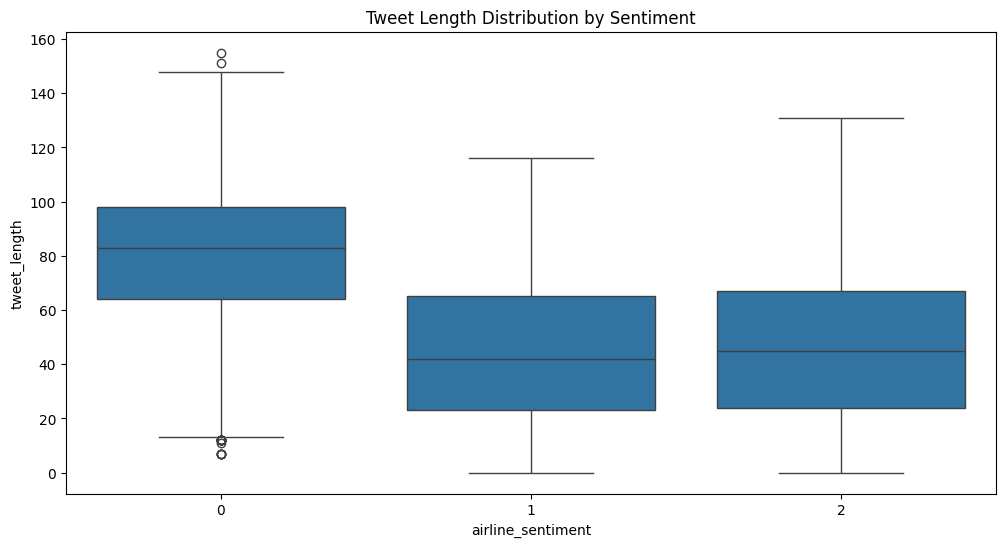


Tweet Length Summary Statistics:
count    14640.000000
mean        67.059016
std         30.431405
min          0.000000
25%         44.000000
50%         71.000000
75%         90.000000
max        155.000000
Name: tweet_length, dtype: float64

Measures of Spread for Tweet Length:
Variance: 926.07
Standard Deviation: 30.43
Interquartile Range: 46.00


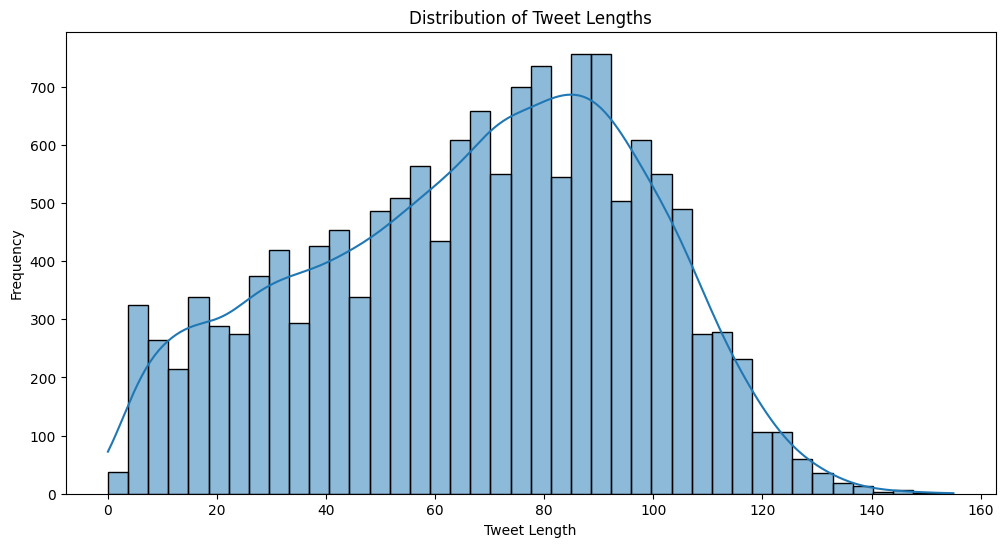


Number of peaks in tweet length distribution: 1
The distribution appears to be unimodal.

Skewness of tweet length distribution: -0.23
The distribution is approximately symmetric.


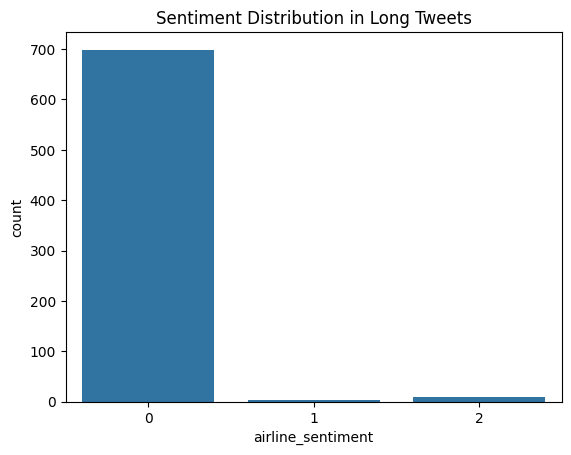


Number of outliers in tweet length: 1
Percentage of outliers: 0.01%


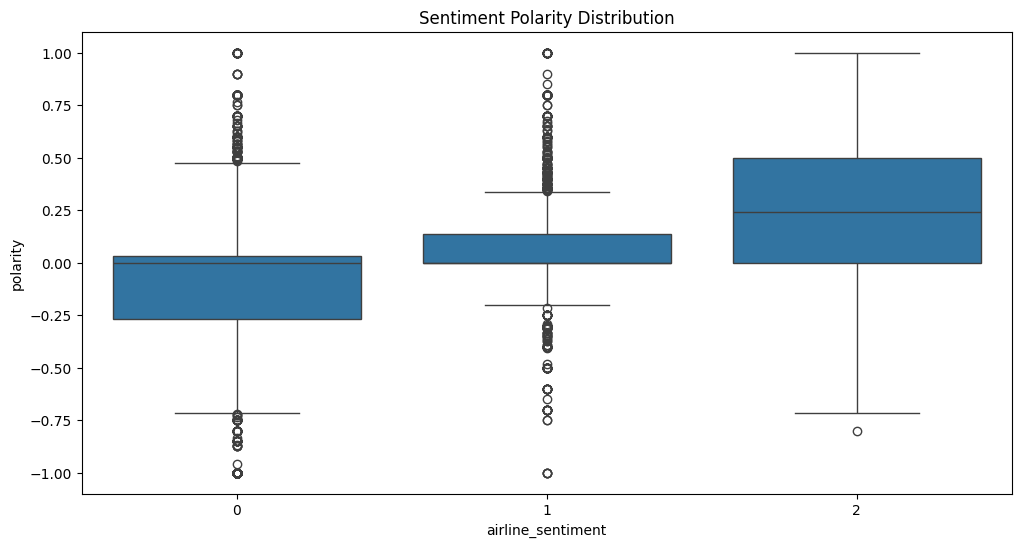


Insights and Next Steps:
1. The dataset is imbalanced with a majority of negative sentiments. We may need to use techniques like SMOTE for balancing.
2. Different airlines have varying sentiment distributions. We could create airline-specific features.
3. Common words and themes identified could be used for feature engineering.
4. Tweet length varies by sentiment and could be a useful feature for our model.
5. The calculated polarity aligns well with manual sentiment labels, validating our dataset.
6. Time-based patterns in tweet frequency could inform feature engineering or provide context for sentiment shifts.
7. The tweet length distribution is skewed and contains outliers, which may require special handling in our model.

Based on these insights, our next steps in data processing and feature engineering could include:
- Applying SMOTE or other balancing techniques to address class imbalance
- Creating features based on airline, common words/themes, tweet length, and time-based pat

In [ ]:
from collections import Counter


#size adjustment
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'airline_sentiment', data = tweets, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()
print(f"Original dataset size: {tweets.shape[0]} rows and {tweets.shape[1]} columns")

#Calculate sentiment polarity
tweets['polarity'] = tweets['final_text'].apply(lambda text: TextBlob(text).sentiment.polarity)
tweets['tweet_length'] = tweets['final_text'].apply(len)
corr_matrix = tweets[['tweet_length', 'polarity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Hashtag Analysis
# Flatten list of hashtags
all_hashtags = [hashtag for hashtags in tweets['hashtags'] for hashtag in hashtags]
hashtag_freq = Counter(all_hashtags)

# Plot top 20 hashtags
plt.figure(figsize=(12, 6))
hashtag_freq_df = pd.DataFrame(hashtag_freq.most_common(20), columns=['hashtag', 'frequency'])
sns.barplot(x='hashtag', y='frequency', data=hashtag_freq_df)
plt.title('Top 20 Most Common Hashtags')
plt.xticks(rotation=45)
plt.show()

tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created'])  # Convert to datetime
# Extract day of the week from tweet creation time
tweets['day_of_week'] = tweets['tweet_created'].dt.day_name()

# Count plot for tweets per day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=tweets, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Tweets by Day of the Week')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.show()

# Word Frequency Analysis
from collections import Counter

all_words = ' '.join(tweets['final_text']).split()
word_freq = Counter(all_words)

plt.figure(figsize=(12, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['word', 'frequency'])
sns.barplot(x='word', y='frequency', data=word_freq_df)
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

# 5. Tweet Length Analysis
tweets['tweet_length'] = tweets['final_text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='airline_sentiment', y='tweet_length', data=tweets)
plt.title('Tweet Length Distribution by Sentiment')
plt.show()

# Summarize data characteristics
print("\nTweet Length Summary Statistics:")
print(tweets['tweet_length'].describe())

# Calculate measures of spread
print("\nMeasures of Spread for Tweet Length:")
print(f"Variance: {tweets['tweet_length'].var():.2f}")
print(f"Standard Deviation: {tweets['tweet_length'].std():.2f}")
print(f"Interquartile Range: {tweets['tweet_length'].quantile(0.75) - tweets['tweet_length'].quantile(0.25):.2f}")

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(tweets['tweet_length'], kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

import numpy as np
from scipy import stats
from scipy import signal

# Check for modality
kde = stats.gaussian_kde(tweets['tweet_length'])
x_range = np.linspace(tweets['tweet_length'].min(), tweets['tweet_length'].max(), 1000)
y_values = kde(x_range)
peaks, _ = signal.find_peaks(y_values)

print(f"\nNumber of peaks in tweet length distribution: {len(peaks)}")
if len(peaks) == 1:
    print("The distribution appears to be unimodal.")
elif len(peaks) == 2:
    print("The distribution appears to be bimodal.")
else:
    print("The distribution appears to be multimodal.")

# Check for skewness
skewness = stats.skew(tweets['tweet_length'])
print(f"\nSkewness of tweet length distribution: {skewness:.2f}")
if abs(skewness) < 0.5:
    print("The distribution is approximately symmetric.")
elif skewness < 0:
    print("The distribution is left-skewed (negatively skewed).")
else:
    print("The distribution is right-skewed (positively skewed).")

# Identify outliers
Q1 = tweets['tweet_length'].quantile(0.25)
Q3 = tweets['tweet_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.4 * IQR
upper_bound = Q3 + 1.4 * IQR

# Detecting statistical outliers
long_tweets = tweets[tweets['tweet_length'] > tweets['tweet_length'].quantile(0.95)]
sns.countplot(x='airline_sentiment', data=long_tweets)
plt.title('Sentiment Distribution in Long Tweets')
plt.show()
outliers = tweets[(tweets['tweet_length'] < lower_bound) | (tweets['tweet_length'] > upper_bound)]
print(f"\nNumber of outliers in tweet length: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(tweets) * 100:.2f}%")

# 6. Sentiment Polarity Analysis
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

tweets['polarity'] = tweets['final_text'].apply(get_polarity)

plt.figure(figsize=(12, 6))
sns.boxplot(x='airline_sentiment', y='polarity', data=tweets)
plt.title('Sentiment Polarity Distribution')
plt.show()

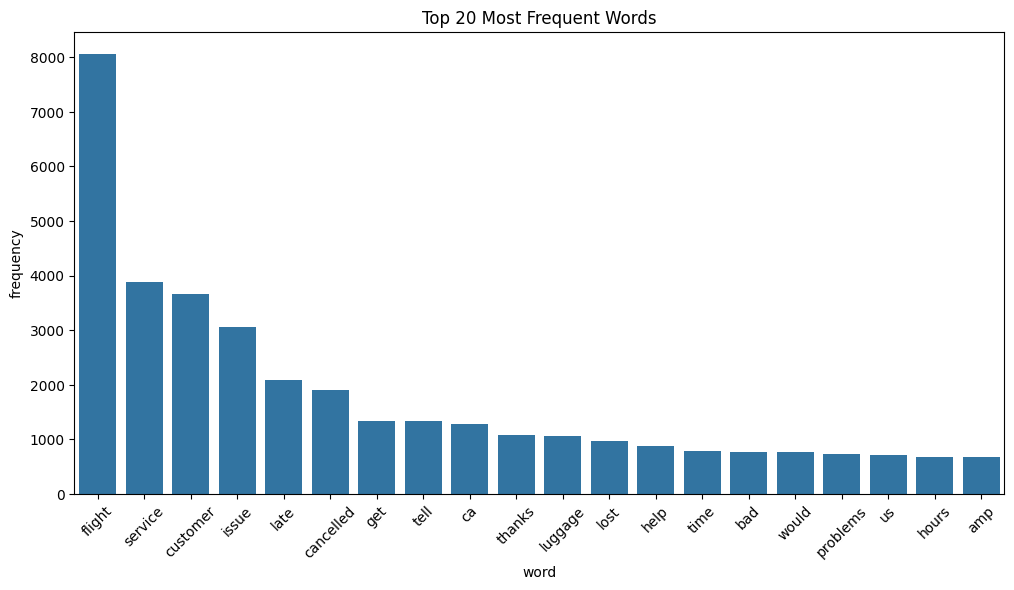

Selected Feature Scores: [0.17886928 0.16116035]


<ipython-input-10-e08ddff22161>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='airline_sentiment', y='tweet_length', data=tweets, palette='Set1')


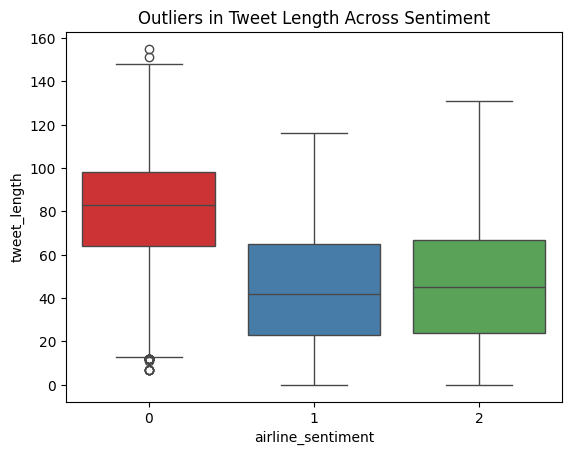

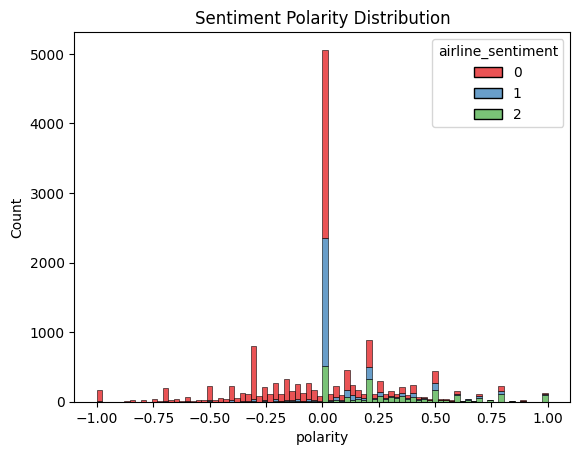

In [ ]:
# 4. Word Frequency Analysis
from collections import Counter

all_words = ' '.join(tweets['final_text']).split()
word_freq = Counter(all_words)

plt.figure(figsize=(12, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['word', 'frequency'])
sns.barplot(x='word', y='frequency', data=word_freq_df)
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

# Step 2: Uncovering underlying structure (scaling and feature selection)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Scaling features before selection
X_final = tweets[['tweet_length', 'polarity']]  # Using relevant features
y = tweets['airline_sentiment']  # Target (sentiment)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Extraction of important variables (feature selection)
selector = SelectKBest(mutual_info_classif, k=2)  # Selecting top 2 features
X_selected = selector.fit_transform(X_scaled, y)
print("Selected Feature Scores:", selector.scores_)

# Step 3: Detecting outliers/anomalies with tweet length
sns.boxplot(x='airline_sentiment', y='tweet_length', data=tweets, palette='Set1')
plt.title('Outliers in Tweet Length Across Sentiment')
plt.show()

# Step 4: Testing underlying assumptions (distribution checks)
sns.histplot(data=tweets, x='polarity', hue='airline_sentiment', multiple='stack', palette='Set1')
plt.title('Sentiment Polarity Distribution')
plt.show()



#Model

Evaluating MultinomialNB...
Evaluating GaussianNB...
Evaluating KNN...


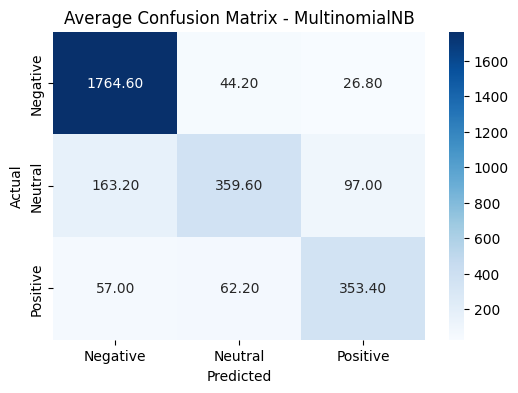

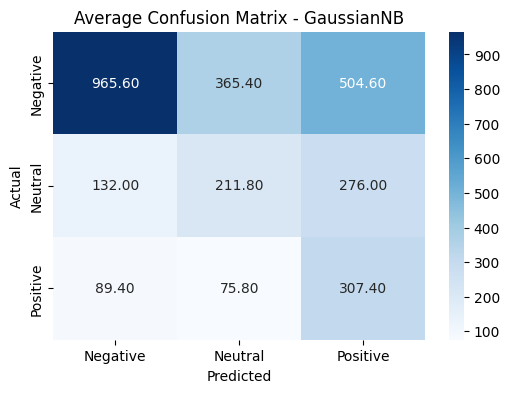

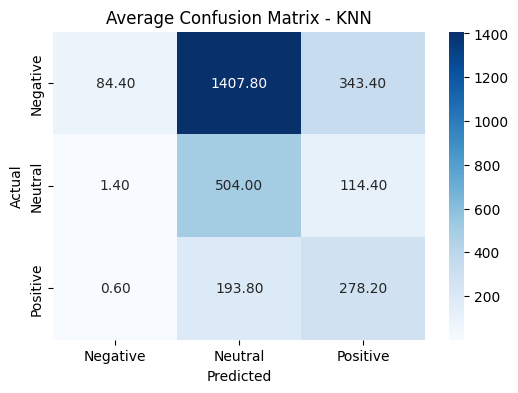

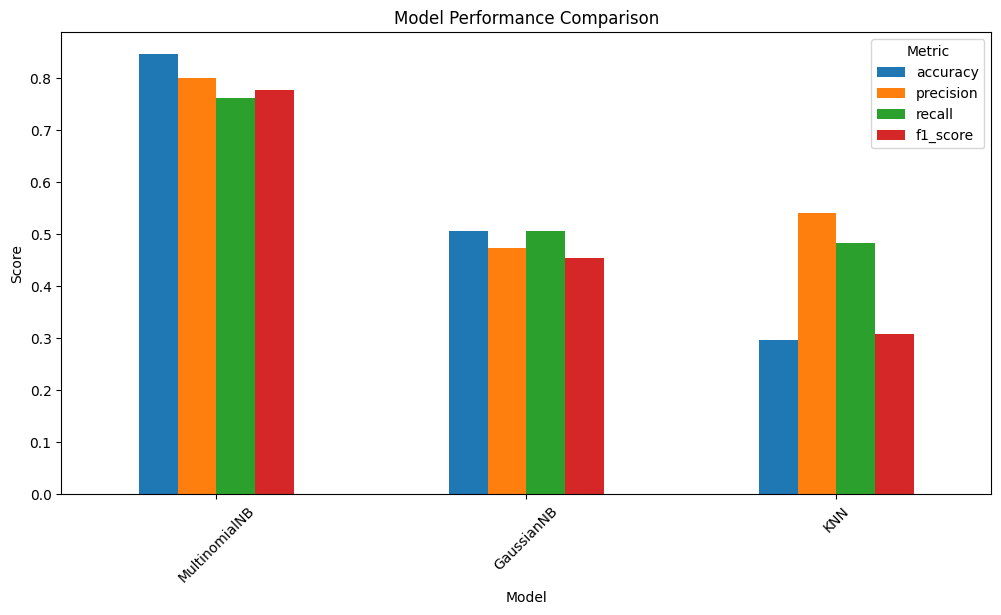

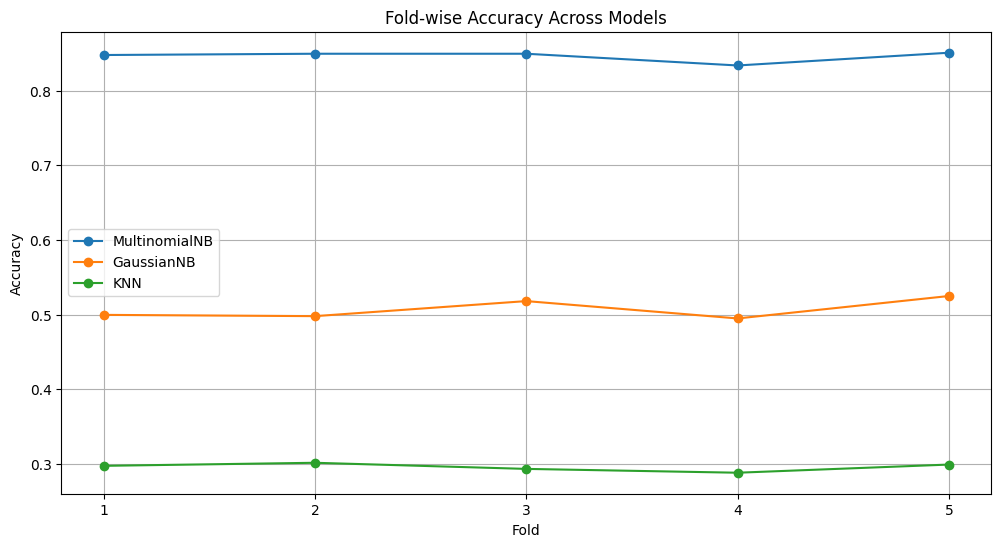

Final Average Metrics for Each Model:
               accuracy  precision    recall  f1_score
MultinomialNB  0.846175   0.800516  0.763094  0.776699
GaussianNB     0.507104   0.473618  0.506071  0.455240
KNN            0.295970   0.540932  0.482612  0.307765


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF Vectorization
tfid = TfidfVectorizer()
X_final = tfid.fit_transform(tweets['final_text'])  # Transform text data
y = tweets['airline_sentiment'].values  # Convert to NumPy array for compatibility

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Models to evaluate
models = {
    "MultinomialNB": MultinomialNB(),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Store results
results = {}
conf_matrices = {}
fold_metrics = {model_name: [] for model_name in models.keys()}  # Store per-fold metrics

# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    cumulative_cm = np.zeros((3, 3))  # Assuming 3 sentiment classes: Negative, Neutral, Positive

    for train_index, test_index in kf.split(X_final, y):
        # Split data
        X_train, X_test = X_final[train_index], X_final[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply SMOTE to training data
        if model_name == "GaussianNB":  # GaussianNB requires dense input
            X_train_sm, y_train_sm = smote.fit_resample(X_train.toarray(), y_train)
        else:
            X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

        # Train model
        model.fit(X_train_sm, y_train_sm)

        # Predict
        if model_name == "GaussianNB":  # Dense input for GaussianNB
            y_pred = model.predict(X_test.toarray())
        else:
            y_pred = model.predict(X_test)

        # Update cumulative confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
        cumulative_cm += cm

        # Compute fold metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
        fold_metrics[model_name].append({
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1
        })

    # Average Confusion Matrix
    avg_cm = cumulative_cm / kf.n_splits
    conf_matrices[model_name] = avg_cm

# Average metrics per model
avg_metrics = {}
for model_name, metrics in fold_metrics.items():
    metrics_df = pd.DataFrame(metrics)
    avg_metrics[model_name] = metrics_df.mean().to_dict()

# Convert metrics to DataFrame for visualization
metrics_df = pd.DataFrame(avg_metrics).T

# Plot Average Confusion Matrix for each model
for model_name, avg_cm in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(avg_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f"Average Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot Metrics Comparison
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()

# Line Chart to Analyze Fold-wise Accuracy
plt.figure(figsize=(12, 6))
for model_name, metrics in fold_metrics.items():
    fold_accuracies = [m['accuracy'] for m in metrics]
    plt.plot(range(1, kf.n_splits + 1), fold_accuracies, marker='o', label=model_name)
plt.title("Fold-wise Accuracy Across Models")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1, kf.n_splits + 1))
plt.legend()
plt.grid()
plt.show()

# Final Results Summary
print("Final Average Metrics for Each Model:")
print(metrics_df)


In [ ]:
# Determine the best sentiment model
best_model_name = metrics_df['f1_score'].idxmax()
print(f"The best sentiment model is: {best_model_name}")

# Assign the best sentiment model
sentiment_model = models[best_model_name]

useri = ''
print(f"Using the best sentiment model: {best_model_name}")
while useri.lower() != "quit":
    useri = input("Enter sample data for testing (type 'quit' to exit): ")
    if useri.lower() == "quit":
        print("Exiting.")
        break

    # Preprocess user input
    useri_preprocessed = useri
    useri_preprocessed = remove_stopwords(useri_preprocessed)
    useri_preprocessed = remove_url(useri_preprocessed)
    useri_preprocessed = remove_punctuation(useri_preprocessed)
    useri_preprocessed = remove_html_tags(useri_preprocessed)
    useri_preprocessed = remove_twitter_username(useri_preprocessed)
    useri_preprocessed = remove_emoji(useri_preprocessed)
    useri_preprocessed = abbreviate(useri_preprocessed)
    useri_preprocessed = remove_numbers(useri_preprocessed)

    # Vectorize user input for sentiment analysis
    sentiment_vectorized_input = tfid.transform([useri_preprocessed])

    # Make sentiment prediction
    sentiment_pred = sentiment_model.predict(sentiment_vectorized_input)
    print("Sentiment Prediction:", sentiment_pred)

    # Get sentiment prediction probabilities if available
    if hasattr(sentiment_model, "predict_proba"):
        sentiment_probs = sentiment_model.predict_proba(sentiment_vectorized_input)
        print("Sentiment Prediction Probabilities:", sentiment_probs)

        # Determine sentiment verdict
        if sentiment_probs[0][0] > sentiment_probs[0][1] and sentiment_probs[0][0] > sentiment_probs[0][2]:
            sentiment_verdict = "Negative"
        elif sentiment_probs[0][1] > sentiment_probs[0][0] and sentiment_probs[0][1] > sentiment_probs[0][2]:
            sentiment_verdict = "Neutral"
        else:
            sentiment_verdict = "Positive"
        print("Sentiment Verdict:", sentiment_verdict)
    else:
        print("This sentiment model does not support probability predictions.")

    # Vectorize user input for sarcasm detection
    sarcasm_vectorized_input = cv.transform([useri])

    # Make sarcasm prediction
    sarcasm_pred = sarcasm_model.predict(sarcasm_vectorized_input)
    print("Tone Prediction:", sarcasm_pred[0])


The best sentiment model is: MultinomialNB
Using the best sentiment model: MultinomialNB
Sentiment Prediction: [0]
Sentiment Prediction Probabilities: [[0.70908964 0.0724817  0.21842866]]
Sentiment Verdict: Negative
Tone Prediction: Sarcasm
Sentiment Prediction: [2]
Sentiment Prediction Probabilities: [[0.07328276 0.04932062 0.87739662]]
Sentiment Verdict: Positive
Tone Prediction: Not Sarcasm
